In [23]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path as P
import os
from glob import glob
feature_path = P('/root/dj/code/CenterPoint-KITTI/output/IA-SSD-GAN-vod-aug/debug/eval/inter_feats/main_branch')
feature_layer_list = sorted(list(feature_path.glob('*')))
group_fnames = sorted(glob(str(feature_layer_list[0]/'*_group*')))
group_fnames = [x.split('/')[-1] for x in group_fnames]
center_fnames = sorted(glob(str(feature_layer_list[0]/'*center*')))
center_fnames = [x.split('/')[-1] for x in center_fnames]


In [24]:
group_fnames[216]
# group_fnames[100]
# group_fnames[0]

'00216_group.npy'

In [25]:
features_list = []
center_list = []
idx = 216
for layer in feature_layer_list:
    full_group_name = str(layer / group_fnames[idx])
    full_center_name = str(layer / center_fnames[idx])
    try:
        features_list += [np.load(full_group_name)]
        center_list += [np.load(full_center_name)]
    except:
        pass

In [26]:
len(features_list)

4

In [27]:
features_list[3].shape # [B, C, N, nsample]

(1, 1027, 128, 32)

In [28]:
coord = features_list[0][0, :3, :, :]
feat = features_list[0][0, 3:, :, :]

In [29]:
coord.shape

(3, 512, 32)

In [30]:
cur_center = center_list[3]

In [31]:
feat.shape

(64, 512, 32)

In [32]:
group_features = feat[:, 0, :]

In [33]:
group_features.shape

(64, 32)

In [34]:
t = np.argmax(group_features, axis=1)

In [35]:
feat_idx = np.argmax(feat, axis=-1)

In [36]:
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
feat_idx.shape

(64, 512)

In [38]:
cur_center.shape

(1, 128, 3)

In [39]:
(cur_center[0, :, 0] < 20) & (cur_center[0, :, 0] > 17)

array([ True, False, False, False,  True,  True, False, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True]

In [40]:
import pickle
root_path = P('/root/dj/code/CenterPoint-KITTI/output/IA-SSD-GAN-vod-aug/debug/eval/checkpoint_epoch_11')
    # ia-ssd
    # root_path = P('/root/dj/code/CenterPoint-KITTI/output/IA-SSD-vod-radar/iassd_128_all/eval/checkpoint_epoch_100')
    
    # root_path = P('/root/dj/code/CenterPoint-KITTI/output/pointpillar_vod_lidar/filter5/eval/eval_with_train/epoch_80/val')

color_dict = {}

gt_save_dir = root_path / 'GT_all_bev'
pred_save_dir = root_path / 'pred_bev'
gt_save_dir.mkdir(exist_ok=True)
pred_save_dir.mkdir(exist_ok=True)

# for i, v in enumerate(cls_name):
#     color_dict[v] = label_color_palette_2d[v]
# load gt
with open(str(root_path / 'gt.pkl'), 'rb') as f:
    gt = pickle.load(f)

# load det
with open(str(root_path / 'dt.pkl'), 'rb') as f:
    dt = pickle.load(f)

# load centers
with open(str(root_path / 'centers.pkl'), 'rb') as f:
    centers = pickle.load(f)

# load centers_origin
with open(str(root_path / 'centers_origin.pkl'), 'rb') as f:
    centers_origin = pickle.load(f)

# load input points (after sampling to 512 points)
with open(str(root_path / 'points.pkl'), 'rb') as f:
    points = pickle.load(f)

In [41]:
cur_center.shape

(1, 128, 3)

In [42]:
import open3d as o3d
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(cur_center)

In [43]:
from scipy.spatial.transform import Rotation as R

from visualize_point_based import transform_anno, drawBEV

def get_rotation(yaw):
    # x,y,_ = arr[:3]
    # yaw = np.arctan(y/x)
    angle = np.array([0, 0, yaw])
    r = R.from_euler('XYZ', angle)
    return r.as_matrix()

def get_bbx_param(obj_info):

    center = obj_info[:3]
    extent = obj_info[3:6] + np.array([0, 0, 10])
    angle = -obj_info[6]
    # center[-1] += 0.5 * extent[-1]

    rot_m = get_rotation(angle)
    
    obbx = o3d.geometry.OrientedBoundingBox(center.T, rot_m, extent.T)
    return obbx
    
fix_frame_id = '04197'


In [44]:
# cur_center[ 83, :]

In [45]:
test = cur_center.squeeze(0)
test[
    (test[:, 0] > 30)&
    (test[:, 0] < 35)
]

array([[30.504318  , -0.21465677,  0.34385434],
       [30.505007  , -0.12553607, -1.3351623 ]], dtype=float32)

In [46]:
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

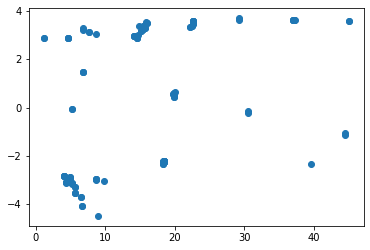

In [47]:
plt.scatter(test[:,0], test[:,1])
plt.show()

In [48]:
points['00216'].shape

(512, 6)

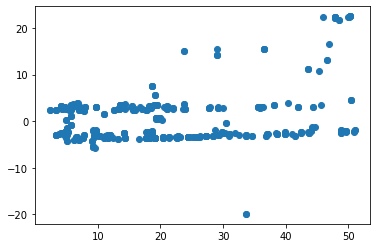

In [49]:
test_id = '00216'
plt.scatter(points['00216'][:,1], points['00216'][:,2])
plt.show()

(-30.0, 30.0)

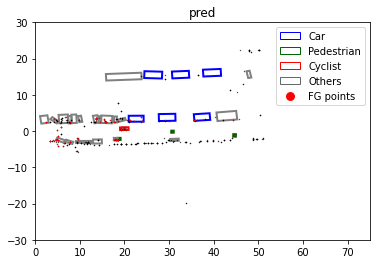

In [50]:
from vod.visualization.settings import label_color_palette_2d
cls_name = ['Car','Pedestrian', 'Cyclist', 'Others']
color_dict = {}
for i, v in enumerate(cls_name):
    color_dict[v] = label_color_palette_2d[v]
ax = plt.gca()
drawBEV(ax, points[test_id], centers_origin[test_id], gt[test_id], color_dict, test_id, 'pred')
plt.xlim(-0,75)
plt.ylim(-30,30)



In [51]:
cur_center.shape

(1, 128, 3)

In [52]:
features_list[2].shape

(1, 259, 256, 32)

In [53]:
save_path = root_path / 'vis_pooling'
save_path.mkdir(exist_ok=True)

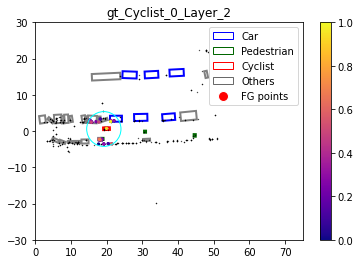

In [54]:
import matplotlib.cm as cm

anno_type = 'gt'
if anno_type == 'pred':
    anno = dt[str(idx).zfill(5)][0]
else:
    anno = gt[str(idx).zfill(5)]

cur_class_name = 'Car'
draw_cls_name = ['Car','Pedestrian', 'Cyclist']
for cur_class_name in cls_name:

    select = anno['name'] == cur_class_name
    loc = anno['location'][select]
    yaw = anno['rotation_y'][select]
    extent = anno['dimensions'][select]


    # cur_label_idx = 0


    for cur_label_idx in range(sum(select)):

        x, y, z = transform_anno(loc[cur_label_idx], fix_frame_id)
        dx, dy, dz = extent[cur_label_idx]
        rot_y = yaw[cur_label_idx]
        obj_info = np.array([x, y, z, dx, dy, dz, rot_y])
        box = get_bbx_param(obj_info)


        layer_range = [0, 1, 2]
        for layer_idx in layer_range:
            plt.cla()
            plt.clf()
            cur_center = center_list[layer_idx].squeeze(0)
            cur_grouped = features_list[layer_idx]
            cur_feat = cur_grouped[:, 3:,:,:]
            cur_coords = cur_grouped[:, :3, :, :]
            radius_list = [0.8, 1.6, 4.8, 6.4]
            pcd = o3d.geometry.PointCloud()
            pcd.points = o3d.utility.Vector3dVector(cur_center)
            ctr_idx = box.get_point_indices_within_bounding_box(pcd.points)
            # print(ctr_idx)
            if len(ctr_idx ) == 0:
                continue
            ped_center = cur_center[ctr_idx[0],:]
            selected_coords = cur_coords[0, :, ctr_idx[0], :]
            selected_feats = cur_feat[0, :, ctr_idx[0], :]
            selected_feats[selected_feats < 0] = 0
            bins = selected_feats.shape[1]
            max_idx = np.argmax(selected_feats, axis=1)
            hist = np.histogram(max_idx, bins=bins, range=(0, bins))[0]
            c = hist/ sum(hist)
            minval = np.min(c[np.nonzero(c)])
            if minval == 1:
                minval = 0
            norm_c = (c - minval)/(max(c) - minval)
            norm_c[norm_c < 0] = 0
            selected_x = selected_coords[0, :].T
            selected_y = selected_coords[1, :].T

            sort_ind = np.argsort(norm_c, axis=0)
            sorted_x = np.take_along_axis(selected_x, sort_ind, axis=0)
            sorted_y = np.take_along_axis(selected_y, sort_ind, axis=0)
            sorted_c = np.take_along_axis(norm_c, sort_ind, axis=0)

            colormap = plt.cm.get_cmap('plasma') # 'plasma' or 'viridis'

            hot_c = cm.plasma(sorted_c)
            plt.rcParams['figure.dpi'] = 200
            ax = plt.gca()
            title = anno_type + '_' + cur_class_name + '_' + str(cur_label_idx) + '_' + 'Layer_' + str(layer_idx)
            if anno_type == 'gt':
                draw_anno = gt[test_id]
            elif anno_type == 'pred':
                draw_anno = dt[test_id]
            drawBEV(ax, points[test_id], None, draw_anno, color_dict, test_id, title)
            ax.scatter(sorted_x, sorted_y, c=hot_c, s=5)
            circle = plt.Circle(ped_center[0:2], radius_list[layer_idx], fill=False, color='cyan')
            ax.add_patch(circle)
            handle_legend = ax.get_legend_handles_labels()
            plt.xlim(-0,75)
            plt.ylim(-30,30)
            sm = plt.cm.ScalarMappable(cmap=colormap)
            sm.set_clim(vmin=0, vmax=1)
            plt.colorbar(sm)
            fig_name = title + '.png'
            save_fname = str(save_path / fig_name)
            plt.savefig(save_fname)


In [55]:
c

array([0.10546875, 0.0546875 , 0.02734375, 0.09765625, 0.0546875 ,
       0.0546875 , 0.03515625, 0.03515625, 0.02734375, 0.0234375 ,
       0.        , 0.015625  , 0.0390625 , 0.0390625 , 0.        ,
       0.03515625, 0.015625  , 0.0078125 , 0.        , 0.0546875 ,
       0.015625  , 0.06640625, 0.03515625, 0.03125   , 0.0234375 ,
       0.        , 0.        , 0.00390625, 0.07421875, 0.00390625,
       0.        , 0.0234375 ])

In [56]:
t = ax.get_legend()
for i, l in enumerate(t):
    print(i)
    print(l)

TypeError: 'Legend' object is not iterable

In [ ]:
selected_feats.argmax(axis=1)

In [ ]:
sorted_c

In [ ]:
handle_legend = ax.get_legend_handles_labels()

In [ ]:
handle_legend

In [ ]:
a = np.array([0, 0, 0, 1, 1])
np.histogram(a)